In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile 
zip_ref=zipfile.ZipFile("/content/drive/My Drive/intel-image-classification.zip",'r')
zip_ref.extractall('/tmp')
zip_ref.close()


<table style="width: 100%">
<tr>
    <td style="width: 20%; text-align: left">
<img src="sorbonne.png" width=40% align="left"/>
    </td>  
    <td style="width: 60%; text-align: center">
<h1>Sorbonne Université - ISUP</h1> <br>
<h2>Master Mathématiques et Applications</h2> <br>
<h3>Parcours Ingénierie Statistique et Data Science (ISDS)</h3> <br>
    </td>
    <td style="width:20%; text-align: right">
<img src="isup.png" width=25% align="right"/>
    </td> 
</tr>
</table>           

<table>
    <tr style="border-top: 1px solid black; border-bottom: 1px solid black">
        <td>
            <h1>Classification d'images à partir de 6 scènes du monde entier</h1>
        </td>
    </tr>
</table>


<center><i>Réalisé par : </i>Douba JAFUNO,    Halil ERGUN,         Oumar BALDÉ </center>

<table>
    <tr style="text-align: center;vertical-align:left">
    <td style="border-top: 1px solid black; border-bottom: 1px solid black;vertical-align: middle">     
 <h1>Plan du rapport</h1>
    </td>
   </tr>
</table>
 
<table style="width: 100%">
<tr>
    <td style="width: 15%">
    </td>
    <td style="width: 70%; text-align:left">
        <a href="#1"><h1>I. Introduction</h1></a><br>
           &emsp; <a href="#presentation">I.1 Présentation du problème</a><br>
           &emsp; <a href="#preparation">I.2 Préparation et Visualisation des données</a><br><br>

<a href="#2"><h1>II. Apprentissage par rapport aux 1000 premières images </h1></a><br><br>
    &emsp; <a href="#naives">II.1 Naives Bayes</a><br>
    &emsp; <a href="#knn">II.2 K-plus proche voisins (KNN)</a><br>
    &emsp; <a href="#svm">II.3 Machine à vecteur de Suppor(SVM)</a><br>

<a href="#3"><h1>III. Apprentissage sur l’ensemble des Images</h1></a><br><br>
    &emsp; <a href="#rf">III.1 Forêt aléatoire</a><br>
    &emsp; <a href="#ann">III.2 Réseau de Neurone Artificiels (ANN)</a><br>
   
<a href="#4"><h1>IV. Apprentissage avec ImageDataGénérator de Keras</h1></a><br><br>
    &emsp; <a href="#cnn">IV.1 Réseau de Neurone Convolutionnels CNN (CNN)</a><br>

<a href="#5"><h1>V. Conclusion</h1></a><br>
    </td>
    <td style="width: 0%">
    </td>
</tr>
</table>



# <a name="1">I. Introduction</a>

### <a name="presentation"> Présentation du problème </a>
Notre Projet porte sur un probleme de classification d'images issue d'un challenge sur KAGGLE: https://www.kaggle.com/puneet6060/intel-image-classification  en Janvier 2019. Mais ces données ont été initialement publiées sur https://datahack.analyticsvidhya.com par Intel  pour organiser un concours de classification d'images dont le but initial était de construire un puissant réseau de neurones qui puisse classer ces images avec plus de précision.


Notre jeu donnée porte sur des images de 150x150 pixels .Ce sont des données d'images de Scènes naturelles du monde entier. La tâche consiste à classer ces scènes réparties en 6 catégories 
- 0 Buildings
- 1 Forest
- 2 Glacier
- 3 Mountain
- 4 Sea
- 5 Street

que l'on traduit par  (0=Bâtiments, 1=forêt , 2=glacier, 3=montagene, 4=mer, 5=rue).

Le fichier contient un fichier zip qui coontient 3 dossier qui contiennent les données relatives aux jeux d'entrainement, de tests et de prévisions sont séparées dans le fichier zip. Il y a environ 14000 images dans le jeu d'entrainement, 3000 dans le jeu de Test et 7000 dans celui des prédictions que nous n'utiliserons pas au long de ce projet

Il s'agit donc d'un probleme de Classification, tout au long du projet nous mettrons en oeuvre des méthodes de Machine learning afin de classifier nos images et tout cela en utilisant le gpu.

Nous appliquerons dans un premier temps des techniques d’apprentissage bien choisies afin de répondre au problème posé en se basant seulement sur les 1000 premières images sans se préocuper des autres, nous regardons dans chacun des cas les différents scores obtenus notemment avec la matrice de confusion .
Dans un second temps nous appliquerons des méthodes de machine learning dans  lesquels l’ensemble des images  seront intégrées à l’apprentissage.

Enfin, nous résumons les avantages et les inconvénients de chaque modèle,
nous concluons le meilleur modèle de classification des images
dans le cadre de ce projet et nous discutons des résultats
significatifs.


### <a name="preparation"> Préparation et Visualisation des données </a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from random import randint
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import os

In [5]:
print(os.listdir('/tmp'))

['tmpfx5eye3d', 'drivefs_ipc.0', 'seg_pred', 'seg_test', 'seg_train', 'drivefs_ipc.0_shell']


In [0]:
import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers 
import tensorflow.keras.activations as Activations
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils


Identification des classes 

In [0]:
class_= ['buildings','forest', 'glacier','mountain', 'sea', 'street']
class_label ={"buildings":0,"forest": 1, "glacier":2,  "mountain": 3, "sea": 4, "street": 5}
nb_classes = 6


def get_classlabel(class_code):
    labels = {0:"buildings", 1:"forest", 2:"glacier",3:"mountain", 4:"sea",5:"street"}
    
    return labels[class_code]



Chargement de nos données 

In [0]:

def load_data():
    datasets = ["/tmp/seg_train/seg_train/", "/tmp/seg_test/seg_test/"]
    data = []
    for dataset in datasets:
        directory = dataset
        Images = []
        Labels = []
        for dir_name in os.listdir(directory):
            label = class_label[dir_name]
            for file in os.listdir(directory + "/" + dir_name):
                image = cv2.imread( directory + "/" + dir_name + "/" + file)
                image = cv2.resize(image, (150,150))
                Images.append(image)
                Labels.append(label)
        Images, Labels = shuffle(Images, Labels)     
        Images = np.array(Images, dtype = 'float32') 
        Labels = np.array(Labels, dtype = 'int32')   
        
        data.append((Images, Labels))

    return data


On charge nos données puis on normalise

In [0]:
(X_train ,y_train),(X_test,y_test)= load_data()


In [0]:
X_train = X_train / 255.0 
X_test = X_test / 255.0

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14034, 150, 150, 3)
(14034,)
(3000, 150, 150, 3)
(3000,)


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14034, 150, 150, 3)
(14034,)
(3000, 150, 150, 3)
(3000,)


Proportion observée de chaque scène 

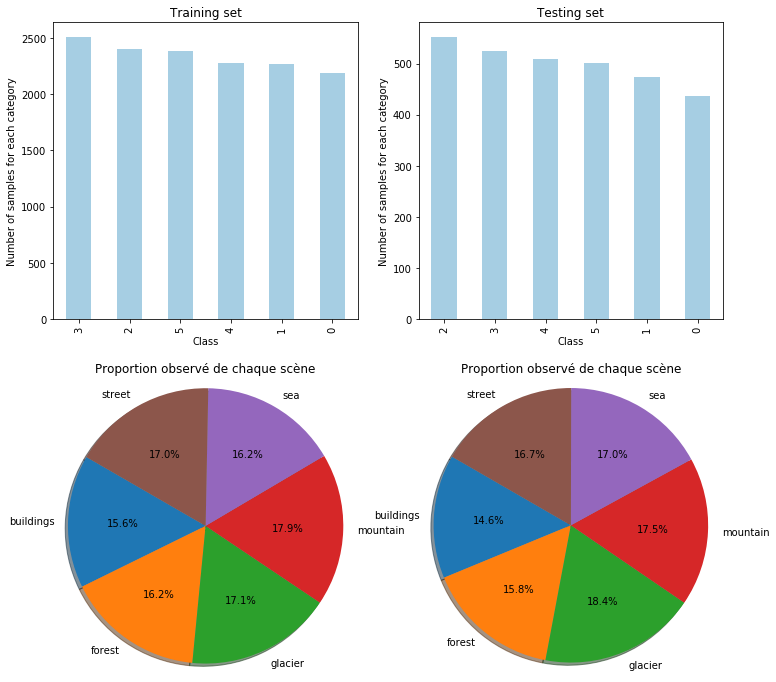

In [0]:
plt.figure(figsize=(12,12))
y_train_df = pd.DataFrame(data = y_train, columns = ['class'])
y_test_df = pd.DataFrame(data = y_test, columns = ['class'])
plt.subplot(221)
y_train_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.subplot(222)
y_test_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.subplot(223)
sizes = np.bincount(y_train)
explode = (0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion observé de chaque scène')
plt.subplot(224)
sizes = np.bincount(y_test)
explode = (0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion observé de chaque scène')

plt.show()

Nous Voyons que sur les données d'entrainement la scène la plus représenté est celle des montagnes en ce qui concerne les donnée test il s'agit des glaciers dans les 2 jeux de données les batiment représente la plus faible proportion, mais on ne peut pas dire que l'écart des effectifs est énorme il varie entre 2200 et 2500 pour les donnés d'entrainement et de 420 à 550 pour les donnée de test et peut etre que cela pourrait avoir un impact sur l'apprentissage 

Matrice de confusion 

Ici nous mettons en place un programme qui renvoie la matrice de confusion de nos modèle afin d'évaluer la qualité d'une classification et nous donne un aperçu du classement de nos points.

La matrice de confusion fournit:

$\bullet$ Nombre de vrai positif (VP)

$\bullet$ Nombre de faux positif (FP)

$\bullet$ Nombre de faux négatif (FN)

$\bullet$ Nombre de vrai négatif (VN)


Et ce sont ces informations obtenues par la matrice de confusion qui nous permettent de calculer la précision et la courbe ROC.

In [0]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_pred, y, classes=None, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title='Confusion matrix'
    cmap=plt.cm.Blues
    
    cm = confusion_matrix(y, y_pred)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if classes is None:
        classes = np.unique(y)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Unnormalized confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

Courbe ROC

.Pour parler de la courbe ROC (Receiving Operator Characteristic) nous allons introduire les terme spécificité et sensibilité. On définit la sensibilité par la proportion de vrais positifs parmi les expériences et la spécificité par proportion de vrais négatifs parmi les expériences. La courbe ROC est la proportion de vrais positifs en fonction de la proportion de faux positifs. La courbe ROC correspond à la représentation graphique du couple (1 – spécificité ; sensibilité) pour les différentes valeurs seuil

In [0]:
import pandas as pd
#ROC Curve
from sklearn.metrics import roc_curve, auc
def Roc_Curve(y_test,y_pred):
  a=y_test
  prediction=y_pred
  yp_dum=pd.get_dummies(a)
  yt_dum=pd.get_dummies(prediction)
  CM = confusion_matrix(a, prediction)
  class_names=np.unique(np.array(CM)) #Used for Confusion Matrix visual.
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(len(class_)):
    fpr[i], tpr[i], _ = roc_curve(yt_dum[i], yp_dum[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  plt.figure() 
  colors=["blue","darkviolet","magenta","orange","gold","red"]
  scene_list=np.unique(np.array(y_train1))
  for i, color, scene in zip(range(len(class_)), colors, scene_list):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class %s (area = %.2f)' %(scene, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([-.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
  plt.show()


Afichage de 25 images 

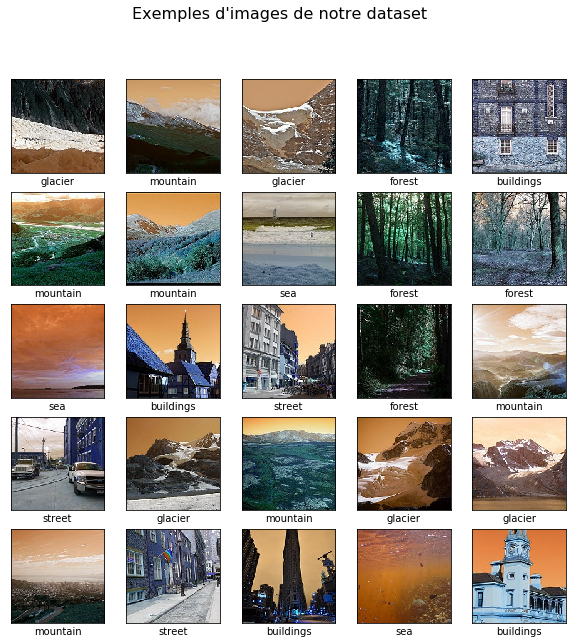

In [0]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Exemples d'images de notre dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_[y_train[i]])
plt.show()

# <a name="2">II. Apprentissage par rapport au 1000 premières images </a>

On récupère **les 1000 premières images**

In [25]:
X_train1 = X_train[:1000]
y_train1 = y_train[:1000]
X_test1 = X_test[:1000]
y_test1 = y_test[:1000]
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)


(1000, 150, 150, 3)
(1000,)
(1000, 150, 150, 3)
(1000,)


On applatit ensuite nos images

In [0]:
X_train_clf = X_train1.reshape(y_train1.shape[0],-1) 
X_test_clf = X_test1.reshape(X_test1.shape[0], -1)


### <a name="naives"> Naives Bayes Classifier </a>

Explication de la méthode :

Cette méthode est un algorithme d’apprentissage supervisé qui permet de classifier un ensemble d’observations selon des règles déterminées par l’algorithme lui-même. Cet outil de classification doit dans un premier temps être entraîné sur un jeu de données d’apprentissage qui montre la classe attendue en fonction des entrées. Pendant la phase d’apprentissage, l’algorithme élabore ses règles de classification sur ce jeu de donnée, pour les appliquer dans un second temps à la classification d’un jeu de données de prédiction. Le classificateur bayésien naïf implique que les classes du jeu de données d’apprentissage soit connu et fournit, d’où le caractère supervisé de l’outil.

Limite du modèle :

Le terme naïf désigne ici le fait que les descripteurs sont conditionnellement indépendants. Ce qui en pratique n’est presque jamais vrai. C’est une hypothèse forte et qui est violée dans la majorité des cas réels. Contre intuitivement, malgré la violation de la contrainte d’indépendance des variables, Naïve Bayes donne de bons résultats de classification.



Pour mettre en place un classifieur naïf de Bayes :

$\bullet$ On détermine un ensemble d’apprentissage

$\bullet$ On détermine des probabilités à priori de chaque classe (par exemple en observant les effectifs)

$\bullet$ On applique la règle de Bayes : $\mathbb{P}(Y=c|X=x)=\frac{\mathbb{P}(X=x|Y=c)\mathbb{P}(Y=c)}{\mathbb{P}(X=x)}$
pour obtenir la probabilité à posteriori des classes au point x

.

$\bullet$ On choisit la classe la plus probable.

Dans la formule de Bayes : $P(Y=c)$: La probabilité à priori

$P(X=x|Y=c)$: La probabilité conditionnelle d’appartenance à la classe $c$, qui peut être interprété comme la vraisemblance de cette classe.

La prédiction de la classification naïve bayésienne peut aboutir à un cas d’égalité où plusieurs classes obtiennent une même probabilité $P(Y)$

Deux approches sont proposées pour gérer ces cas :

$\bullet$ Choix aléatoire : choisi une classe de manière aléatoire dans l’ensemble des classes présentant la même probabilité $P(Y)$


$\bullet$ Plus petit indice : choisi la première classe rencontrée dans l’ensemble des classes présentant la même probabilité P(Y)


Le lissage de Laplace permet d’éviter d’obtenir des probabilités nulles ou égales à un (Le lissage peut aussi être vu comme une façon d’éviter le surentraînement d’un modèle sur un corpus, et de doter du modèle d’une plus grande capacité de généralisation).

Les distributions de probabilité utilisées sont indiquées.

Les variables qualitatives sont supposées suivre une distribution empirique.

La nature de la distribution a priori des classes (uniforme, non uniforme) est aussi rapportée.

Dans notre cas, nous avons choisi le Naive Bayes Classifier parce qu'il est rapide, probant et facile à utiliser.
La formation au modèle bilistique est simple et donne des résultats satisfaisants même si les données des tests est limitée.

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train_clf, y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
predictions = gnb_clf.predict(X_test_clf)
pred_labels = predictions

Affichage d'une image prédite et de sa véritable classe

In [0]:
index = np.random.randint(y_test.shape[0]) #choix aléatoire
print(index)
img_t = X_test[index].reshape(1,-1)
predictions = gnb_clf.predict(img_t)    
pred_img = np.argmax(predictions) 
pred_label = class_[predictions[pred_img]]
true_label = class_[y_test[index]] 
print(predictions)


1804
[5]


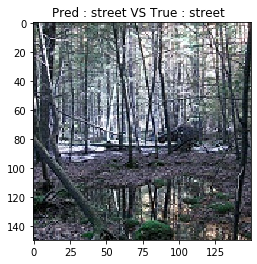

In [0]:
title = 'Pred : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(X_test[index])
plt.grid(False)
plt.title(title)
plt.show()

Fonction qui renvoie 25 images qui n'ont pas été bien prédites par notre classifieur 

In [0]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
 
    TOF = (test_labels == pred_labels)
    mislabeled_indices = np.where(TOF == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Exemples d'images mal clasées:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_[mislabeled_labels[i]])
    plt.show()

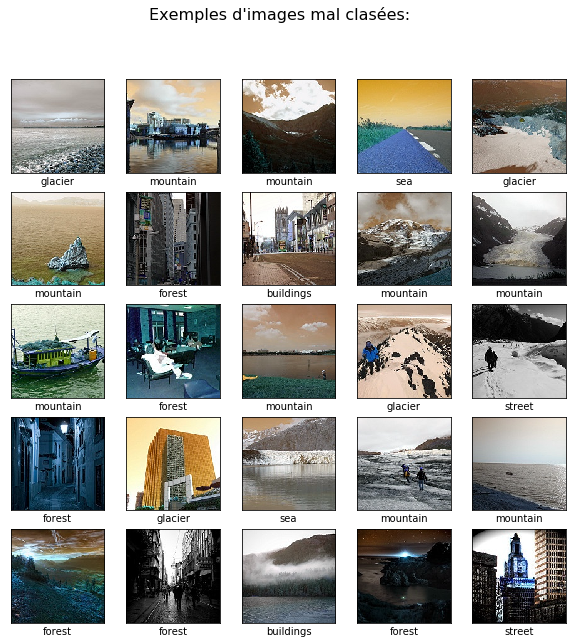

In [0]:

predictions = gnb_clf.predict(X_test_clf)
pred_labels = predictions ### nos prediction
print_mislabeled_images(class_, X_test1, y_test1, pred_labels)

---------------------------Rapport de Naives Bayes------------------------------


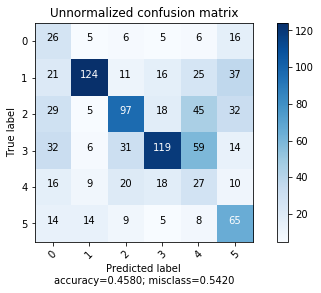

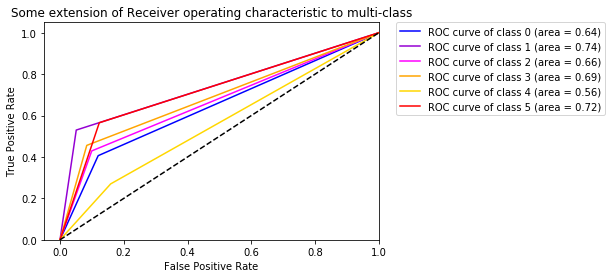

              precision    recall  f1-score   support

           0       0.41      0.19      0.26       138
           1       0.53      0.76      0.62       163
           2       0.43      0.56      0.49       174
           3       0.46      0.66      0.54       181
           4       0.27      0.16      0.20       170
           5       0.57      0.37      0.45       174

    accuracy                           0.46      1000
   macro avg       0.44      0.45      0.43      1000
weighted avg       0.44      0.46      0.43      1000



In [0]:
print("---------------------------Rapport de Naives Bayes------------------------------")
plt.figure(figsize=(7,7))
plt.subplot(212)
plot_confusion_matrix(y_test1,pred_labels)
Roc_Curve(y_test1,pred_labels)
print(metrics.classification_report(y_test1, pred_labels))

On obtient une précision de **45%** sur nos donnée test. Nous voyons que la classe avec la meilleure précision est celle de la rue avec 50%

### <a name="knn"> K plus proche voisin </a>

L’algorithme KNN figure parmi les plus simples algorithmes d’apprentissage artificiel. Dans un contexte de classification d’une nouvelle observation $X$, l’idée fondatrice simple est de faire voter les plus proches voisins de cette observation. La classe de $x$ est déterminée en fonction de la classe majoritaire parmi les k plus proches voisins de l’observation $x$. La méthode KNN est donc une méthode à base de voisinage, non-paramétrique. Ceci signifiant que l’algorithme permet de faire une classification sans faire d’hypothèse sur la fonction: 
$Y=f(X_1+X_2,.....,X_p)$

Elle relie la variable dépendante aux variables indépendantes.

KNN est une méthode non paramétrique où une nouvelle observation est classée dans la classe d’appartenance de l’observation de l’échantillon d’apprentissage qui lui est la plus proche, au regard des covariances utilisées. La détermination de leur similarité est basée sur des mesures de distance.

Soit $L$ l’ensemble de données à disposition ou échantillon d’apprentissage :$ L=\{(Y_i,X_i),i=1,....,n\}$

La détermination du plus proche voisin est basée sur une fonction distance arbitraire $( d(x,y))$ . La distance euclidienne ou dis-similarité entre deux individus caractérisés par p covariances est définie par:

$d(X,Y)=d((X_1,X_2,X_3....,X_p),(Y_1,Y_2,Y_3,....Y_p)) =\sqrt[]{(X_1-Y_1)^2+(X_2-Y_2)^2+.....(X_p-Y_p)^2}=\sqrt[]{\sum_{i=1}^n(X_i-Y_i)^2}=||X-Y||_2$

Bien sûr, nous pouvons également utiliser sa mesure de distance. Par exemple, la  distance Manhattan, défini comme: $d(X,Y)=|X_1-Y_1|+|X_2-Y_2|+|X_3+Y_3|+....+|X_n-Y_n|$

Aussi la distance de Minkowski, définie comme: $d(X,Y)=\sqrt[p]{(|X_1-Y_1|)^p+(|X_2-Y_2|)^p+....+(|X_n-Y_n|)^p}=\sqrt[p]{\sum_{i=1}^n(|X_i-Y_i|)^p}$

**Dans la méthode des $k$ plus proches voisins, la plus proche observation n’est plus la seule observation utilisée pour la classification. Nous utilisons désormais les $k$ plus proches observations. Ainsi la décision est en faveur de la classe majoritairement représentée par les $k$ voisins**. Soit $kr$ le nombre d’observations issues du groupe des plus proches voisins appartenant à la classe $r$: $\sum_{r=1}^cK_r=K$

Quelques règles sur le choix de k : Le paramètre k doit être déterminé par l’utilisateur : k appartient à N. En classification binaire, il est utile de choisir k impair pour éviter les votes égalitaires. Le meilleur choix de k dépend du jeu de donnée. En général, les grandes valeurs de k réduisent l’effet du bruit sur la classification et donc le risque de sur-apprentissage, mais rendent les frontières entre classes moins distinctes. Il convient donc de faire un choix de compromis entre la variabilité associée à une faible valeur de k contre un ‘oversmoothing’ ou sur-lissage (i.e gommage des détails) pour une forte valeur de k. Un bon k peut être sélectionné par diverses techniques heuristiques, par exemple, de validation-croisée. Nous choisirons la valeur de k qui minimise l’erreur de classification. Une grande base d’apprentissage permet une plus grande valeur de k. Nécessaire pour des petites bases d’apprentissage

In [0]:
from sklearn import neighbors

Tout d'abord nous avons choisis de fixer une grille de 10 valeurs pour k, puis choisir la valeur minimisant l'erreur de classification associé à l'algorithme des K-plus proches voisins.

In [0]:
# environ 30min
errors = []
for k in range(1,10):
    knn = neighbors.KNeighborsClassifier(k,n_jobs=-1)
    errors.append(100*(1 - knn.fit(X_train_clf, y_train1).score(X_test_clf, y_test1)))

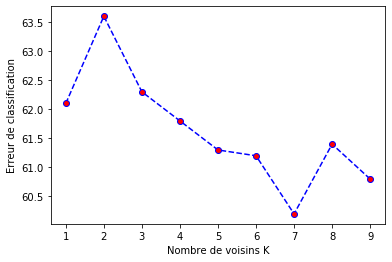

In [0]:
plt.plot(range(1,10), errors,color="blue",linestyle="dashed",marker='o',markerfacecolor="red")
plt.xlabel("Nombre de voisins K")
plt.ylabel("Erreur de classification")
plt.show()

Dans le graphe ci dessus il est difficile de savoir si l'erreur diminuera ou pas en fonction d'un nombre de voisin plus grand. Aussi la courbe augmente et diminue que ce soit avec un nombre pair ou impaire cette approche ne semble pas etre la bonne. Nous choisisons le k avec le meilleur score donc 7

In [0]:
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train_clf, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
predictions = knn_clf.predict(X_test_clf)
pred_labels = predictions ### nos prediction
#print_mislabeled_images(class_, X_test1, y_test1, pred_labels)

---------------------------Rapport de KNN------------------------------


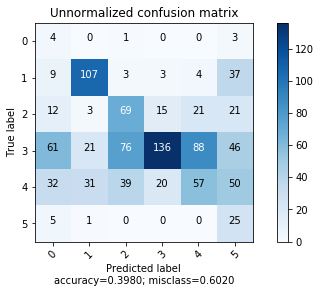

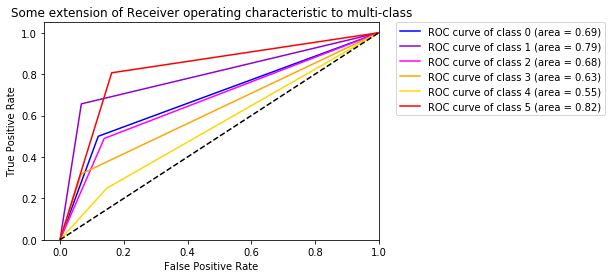

              precision    recall  f1-score   support

           0       0.50      0.03      0.06       123
           1       0.66      0.66      0.66       163
           2       0.49      0.37      0.42       188
           3       0.32      0.78      0.45       174
           4       0.25      0.34      0.29       170
           5       0.81      0.14      0.23       182

    accuracy                           0.40      1000
   macro avg       0.50      0.39      0.35      1000
weighted avg       0.50      0.40      0.36      1000



In [0]:
print("---------------------------Rapport de KNN------------------------------")
plt.figure(figsize=(7,7))
plt.subplot(212)
plot_confusion_matrix(y_test1,pred_labels)
Roc_Curve(y_test1,pred_labels)
print(metrics.classification_report(y_test1, pred_labels))

On obtient un score de **40%** ce qui n'est pas fameux 

### <a name="svm"> Machines à vecteurs de support </a>

Les SVM (Supports Vector Machine) ,machines à vecteurs de support sont une classe de modèles statistiques développés pour la première fois au milieu des années 60 par Vladimir Vapnik. Au cours des années suivantes, ce modèle a considérablement évolué pour devenir l'un des outils d'apprentissage machine les plus flexibles et les plus efficaces qui soient. Il s'agit d'un algorithme d'apprentissage supervisé qui peut être utilisé pour résoudre à la fois les problèmes de classification et de régression, même si l'accent est actuellement mis sur la classification uniquement.

Pour résumer, cet algorithme recherche un hyperplan séparable linéairement, ou une frontière de décision séparant les membres d'une classe de l'autre. Si un tel hyperplan existe, le travail est fait ! Si un tel hyperplan n'existe pas, le SVM utilise une cartographie non linéaire pour transformer les données d'entraînement dans une dimension supérieure. Ensuite, il recherche l'hyperplan de séparation optimal linéaire. Avec une cartographie non linéaire appropriée à une dimension suffisamment élevée, les données de deux classes peuvent toujours être séparées par un hyperplan. L'algorithme SVM trouve cet hyperplan en utilisant des vecteurs de support et des marges. En tant qu'algorithme d'apprentissage, le SVM n'est peut-être pas très rapide par rapport à d'autres méthodes de classification, mais grâce à sa capacité à modéliser des limites non linéaires complexes, le SVM a une grande précision.. Le SVM a été appliqué avec succès à la reconnaissance des chiffres manuscrits, à la classification des textes, à l'identification des locuteurs, etc.


Pour l'entrainement, nous n'avons mis aucun paramètre pour les paramètres gamma à scale et C à 1.0 du SVC car ils ont un grand effet sur les performances du SVC
non linéaire. Le paramètre gamma définit la portée de
l'influence d'un seul exemple d'entraînement et le paramètre C
est un paramètre de régularisation et la pénalité pour les
données mal classées qui empêche le sur-ajustement. Enfin, nous avons choisi RBF
comme noyau parce qu'il a de meilleures performances sur les
données de test. 

In [0]:
from sklearn import svm

In [0]:
svm_clf = svm.SVC()
svm_clf.fit(X_train_clf, y_train1)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions = svm_clf.predict(X_test_clf)
pred_labels = predictions
#print_mislabeled_images(class_, X_test1, y_test1, pred_labels)

---------------------------Rapport de SVM------------------------------


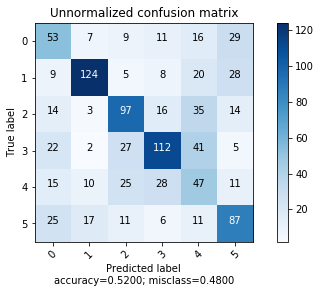

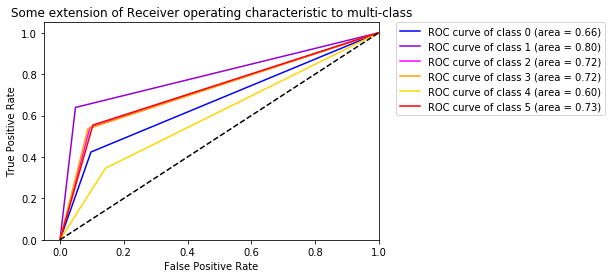

              precision    recall  f1-score   support

           0       0.42      0.38      0.40       138
           1       0.64      0.76      0.69       163
           2       0.54      0.56      0.55       174
           3       0.54      0.62      0.57       181
           4       0.35      0.28      0.31       170
           5       0.55      0.50      0.53       174

    accuracy                           0.52      1000
   macro avg       0.51      0.52      0.51      1000
weighted avg       0.51      0.52      0.51      1000



In [0]:
print("---------------------------Rapport de SVM------------------------------")
plt.figure(figsize=(7,7))
plt.subplot(212)
plot_confusion_matrix(y_test1,pred_labels)
Roc_Curve(y_test1,pred_labels)
print(metrics.classification_report(y_test1, pred_labels))

On obtient un score de **52%** sur nos donnée de test ce qui est moyen  mais mieux que le knn

# <a name="3">III. Apprentissage sur l’ensemble des Images </a>

Tout d'abord on "aplatit" nos images pour le Random Forest

In [0]:
X_train_clf2 = X_train.reshape(y_train.shape[0],-1)
X_test_clf2 = X_test.reshape(y_test.shape[0],-1)

### <a name="rf"> Forêt aléatoire </a>

La forêt aléatoire (Random Forest) est un algorithme de classification qui réduit la variance des prévisions d’un arbre de décision seul, améliorant ainsi leurs performances. Pour cela, il combine de nombreux arbres de décisions dans une approche de type bagging.

L’algorithme a été proposé par Leo Breiman et Adèle Cutler en 2001. Dans sa formule la plus classique, il effectue un apprentissage en parallèle sur de multiples arbres de décision construits aléatoirement et entraînés sur des sous-ensembles de données différents. Le nombre idéal d’arbres, qui peut aller jusqu’à plusieurs centaines voire plus, est un paramètre important : il est très variable et dépend du problème. Concrètement, chaque arbre est entrainé sur un sous ensemble aléatoire de données selon le principe du bagging. Les prédictions sont ensuite moyennées lorsque les données sont quantitatives ou utilisés pour un vote pour des données qualitatives, dans le cas des arbres de classification. Il a été utilisé dans de nombreuses applications, y compris grand public, comme pour la classification d’images de la caméra de console de jeu Kinect* dans le but d’identifier des positions du corps c'est donc pour celà qu'on l'a choisi.

Une image est classée en l'envoyant à
chaque arbre et en agrégeant les distributions de feuilles
atteintes. Le caractère aléatoire peut être injecté à deux
moments de la formation : lors du sous-échantillonnage des
données de formation de manière à ce que chaque arbre soit
cultivé en utilisant un sous-ensemble différent ; et lors de la
sélection des tests de nœuds. Les arbres ici sont binaires et
sont construits de manière descendante. 

Tout d'abord pour choisir un modèle avec un score élevé sur nos donnée de test  on a choisit de mettre en place une grille pour les paramètres n_estimators,n_jobs,bootstrap et criterion et chercher à les optimiser.

In [0]:
# temps long
import warnings
param_grid = {"n_estimators": [100,150,200],
              "n_jobs": [-1],
              "bootstrap": [True, False],
              "criterion": ["gini"]}
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier



In [0]:


model=RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
best_model=grid_search.fit(X_test_clf2, y_test)
y_pred=best_model.predict(X_test_clf2)
print('Best Parameters:', best_model.best_estimator_.get_params()) 




Best Parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [0]:
print('le meilleur score sur notre jeu de test est de : ',best_model.score(X_test_clf2, y_test))


le meilleur score sur notre jeu de test est de :  1.0


Ce score est beaucoup trop élevé (Overfitting) cette approche ne s'est pas avérée concluante. On a donc choisit 150 pour le paramètre n_estimators qui constitue le nombre d'arbre 

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150)
rf.fit(X_train_clf2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(X_test_clf2)
pred_labels = predictions ### nos prediction

---------------------------Rapport de Random Forest------------------------------


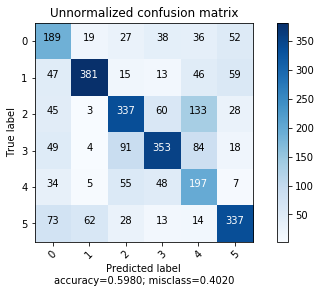

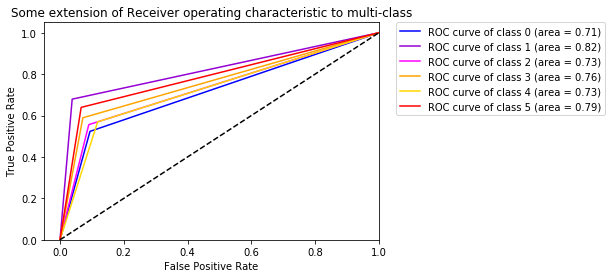

              precision    recall  f1-score   support

           0       0.52      0.43      0.47       437
           1       0.68      0.80      0.74       474
           2       0.56      0.61      0.58       553
           3       0.59      0.67      0.63       525
           4       0.57      0.39      0.46       510
           5       0.64      0.67      0.66       501

    accuracy                           0.60      3000
   macro avg       0.59      0.60      0.59      3000
weighted avg       0.59      0.60      0.59      3000



In [26]:
print("---------------------------Rapport de Random Forest------------------------------")
plt.figure(figsize=(7,7))
plt.subplot(212)
plot_confusion_matrix(y_test,pred_labels)
Roc_Curve(y_test,pred_labels)
print(metrics.classification_report(y_test, pred_labels))

On obtient un score d'environ **60%**. Cependant ont vois par exemple que notre classifieur a du mal à différentier glace et mer avec le 133 dans notre matrice 


### <a name="ann"> Réseau de Neurone Artificiels  </a>

Un réseau neuronal est un algorithme de machine learning basé sur le modèle d'un neurone humain. Le cerveau humain est constitué de millions de neurones. Il envoie et traite des signaux sous forme de signaux électriques et chimiques. Ces neurones sont reliés par une structure spéciale appelée synapses. Les synapses permettent aux neurones de transmettre des signaux. À partir d'un grand nombre de neurones simulés, des réseaux neuronaux se forment.
Un réseau neural artificiel est une technique de traitement d'information. Il fonctionne de la même manière que le cerveau humain traite l'information. Un réseau neuronal artificiel comprend un grand nombre d'unités de traitement connectées qui travaillent ensemble pour traiter l'information. Elles en tirent également des résultats significatifs.
Nous pouvons appliquer le réseau neuronal non seulement pour la classification. Il peut également s'appliquer à la régression d'attributs de cibles continues.

Les réseaux neuronaux trouvent une grande application dans l'exploration des données utilisées dans les secteurs. Par exemple, l'économie, la médecine légale, etc. et pour la reconnaissance d'image. Il peut également être utilisé pour la classification de données dans une grande quantité de données après un entraînement minutieux.

Un réseau de neurones peut contenir les 3 couches suivantes :

- Couche d'entrée - L'activité des unités d'entrée représente l'information brute qui peut alimenter le réseau.
- Couche cachée - Pour déterminer l'activité de chaque unité cachée. Les activités des unités d'entrée et les poids sur les connexions entre les unités d'entrée et les unités cachées. Il peut y avoir une ou plusieurs couches cachées.
- Couche de sortie - Le comportement des unités de sortie dépend de l'activité des unités cachées et des poids entre les unités cachées et les unités de sortie.



l'architecture de notre modèle que nous avons choisis est principalement constituée de 2 couches différentes : 


$\bullet$ Des couches denses (Denses pour le classificateur de sortie)

$\bullet$ l'abandon (Dropout, pour éviter le sur-ajustement ou overffiting  des modèles)

Pour les fonctions d'activation de notre réseau de neurones, nous avons choisi la fonction **Relu** en entré et **Softmax** en sortie et pour la fonction de perte nous allons utiliser la fonction sparse categorigal_crossentropy, voici notre modèle:

In [0]:

model = Models.Sequential()
model.add(Layers.Flatten(input_shape = (150,150,3))) # (14034, 150, 150) => (14034, 150*150)
model.add(Layers.Dense(128, activation='relu'))
model.add(Layers.Dropout(0.1))  
model.add(Layers.Dense(64, activation='relu'))
model.add(Layers.Dense(6, activation='softmax'))
model.compile(optimizer=Optimizer.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_split = 0.2 ) 
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



Train on 11227 samples, validate on 2807 samples
Epoch 1/50
11227/11227 [==============================] - 2s 182us/sample - loss: 12.4725 - acc: 0.1947 - val_loss: 2.8717 - val_acc: 0.2708
Epoch 2/50
11227/11227 [==============================] - 2s 162us/sample - loss: 2.5848 - acc: 0.2998 - val_loss: 1.5049 - val_acc: 0.4282
Epoch 3/50
11227/11227 [==============================] - 2s 161us/sample - loss: 1.5468 - acc: 0.3816 - val_loss: 1.4300 - val_acc: 0.4460
Epoch 4/50
11227/11227 [==============================] - 2s 160us/sample - loss: 1.4232 - acc: 0.4516 - val_loss: 1.3479 - val_acc: 0.4902
Epoch 5/50
11227/11227 [==============================] - 2s 160us/sample - loss: 1.3668 - acc: 0.4711 - val_loss: 1.3254 - val_acc: 0.4952
Epoch 6/50
11227/11227 [==============================] - 2s 161us/sample - loss: 1.3473 - acc: 0.4804 - val_loss: 1.3028 - val_acc: 0.5023
Epoch 7/50
11227/11227 [==============================] - 2s 160us/sample - loss: 1.3086 - acc: 0.4908 - val_l

In [0]:


scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores2 = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores2[1]*100))



14034/14034 [==============================] - 2s 166us/sample - loss: 1.1992 - acc: 0.5778

acc: 57.78%
3000/3000 [==============================] - 0s 162us/sample - loss: 1.3795 - acc: 0.4773

acc: 47.73%


In [0]:
print("Training set Accuracy: %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Testing set Accuracy: %s: %.2f%%" % (model.metrics_names[1], scores2[1]*100))
print("Training set Error: %s: %.2f%%" % (model.metrics_names[1], 100-scores[1]*100))
print("Testing set Error: %s: %.2f%%" % (model.metrics_names[1], 100-scores2[1]*100))

Training set Accuracy: acc: 57.78%
Testing set Accuracy: acc: 47.73%
Training set Error: acc: 42.22%
Testing set Error: acc: 52.27%


Après avoir évalué le modèle avec 3000 données de test, la précision est de **47,7%**, la valeur est supérieure aux résultats de la précision dans la phase de formation (47%< 57%) avec une valeur de perte de 1.3795 où cette valeur est supérieure aux résultats dans la phase de formation. A partir de ces résultats, nous pouvons conclure qu'il y a des différences qui ne sont pas assez importantes, ce qui signifie que notre modèle n'est pas indiqué par un surajustement. Pour voir plus clairement les résultats de l'évaluation, nous pouvons consulter le modèle de tableau d'évaluation dans la section suivante.

In [0]:
train_error = 1-np.asarray(history.history['acc'])
val_error = 1-np.asarray(history.history['val_acc'])

<Figure size 504x360 with 0 Axes>

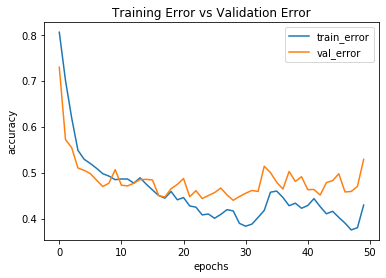

In [0]:
fig = plt.figure(figsize=(7,5))
plt.figure(facecolor='white')
plt.plot(train_error,label = "train_error")
plt.plot(val_error,  label = "val_error")
plt.title("Training Error vs Validation Error")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc='best')

plt.show()

<Figure size 504x360 with 0 Axes>

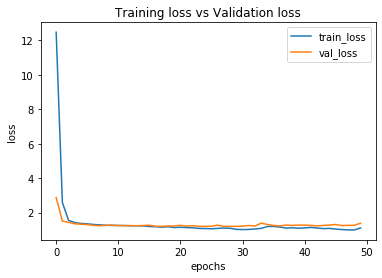

In [0]:
fig = plt.figure(figsize=(7,5))
plt.figure(facecolor='white')
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.title("Training loss vs Validation loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()



# <a name="4">IV. Apprentissage avec ImageDataGenerator de Kéras </a>

Dans cette partie Nous utilisons la classe de Keras: ImageDataGenerator 

Principe: Cette classe accepte un lot d'images utilisé pour la formation
puis y applique une série de transformations aléatoires à chaque image du lot sa peut etre une rotation aléatoire , un redimensionnement, ou bien un cisaillement, etc.) ensuite elle remplace le lot original par le nouveau lot transformé et celà de manière aléatoire

Nous allons donc mettre en place un CNN sur ce lot transformé de manière aléatoire (c'est-à-dire que les données originales elles-mêmes ne serons pas utilisées pour la formation)


### <a name="cnn"> Réseau de Neurone Convolutionnels CNN (CNN) </a>

Le réseau de neurones à convolution (CNN) est l’un des algorithmes les plus répandus de machine learning, où le modèle apprend à réaliser des tâches de classification directement à partir d’images, de vidéos, de textes ou de sons.

Les CNN sont particulièrement utiles pour identifier des modèles dans les images afin de reconnaître des objets, des visages et des scènes. Ils apprennent directement à partir de données d’images et utilisent des modèles pour classer les images, éliminant ainsi la nécessité d’effectuer une extraction manuelle des caractéristiques.

Les CNN sont tout particulièrement utiles pour les applications basées sur la reconnaissance d’objets et la computer vision, comme les véhicules autonomes ou la reconnaissance faciale. Selon l'application, on peut créer un CNN à partir de zéro ou utiliser un modèle préentraîné sur le jeu de données.
![Texte alternatif…](https://miro.medium.com/max/772/1*kkyW7BR5FZJq4_oBTx3OPQ.png)

Un réseau de neurones à convolution peut avoir plusieurs dizaines, voire plusieurs centaines de couches, qui apprennent chacune à identifier différentes caractéristiques d’une image. Des filtres sont appliqués à chaque image utilisée pour l’apprentissage à différentes résolutions, et la sortie de chaque image convoluée est utilisée comme entrée de la couche suivante. Les premiers filtres peuvent être des caractéristiques très simples, comme par exemple la luminosité ou les bords, puis passer à des caractéristiques plus complexes qui définissent l’objet de façon unique.

Les CNN effectuent des tâches d’identification et de classification d’images, de textes, de sons et de vidéos.
Ils possèdent plusieurs couches qui effectuent des opérations qui modifient les données dans l’objectif d’apprendre les caractéristiques spécifiques à ces données. Les trois types de couches les plus répandus sont les suivants : convolution, activation ou ReLU et pooling.

- La couche de convolution fait passer les images d’entrée par un ensemble de filtres convolutifs, chacun de ces filtres activant certaines caractéristiques des images.
-La couche ReLU (Rectified linear unit) permet d’accélérer et d’optimiser l’apprentissage en mappant les valeurs négatives à zéro et en conservant les valeurs positives. Elle est parfois appelée couche d’activation, car seules les caractéristiques activées sont transférées dans la couche suivante.
- La couche de pooling simplifie la sortie en effectuant un sous-échantillonnage non linéaire, réduisant ainsi le nombre de paramètres que le réseau doit apprendre.

Ces opérations sont répétées sur des dizaines ou des centaines de couches, et chacune de ces couches apprend à identifier des caractéristiques différentes.
Après l’apprentissage des caractéristiques dans plusieurs couches, l’architecture d’un CNN se poursuit par la classification.

L’avant-dernière couche est une couche entièrement connectée qui sort un vecteur de K dimensions, où K représente le nombre de classes que le réseau sera capable de prédire. Ce vecteur contient les probabilités de classement pour chaque classe d’une image.

La dernière couche d’une architecture de CNN utilise une couche de classification (softmax par exemple) pour fournir le résultat de classification. 

La fonction Softmax calcule la distribution des probabilités de l'événement sur "n" événements différents. De manière générale, cette fonction calculera les probabilités de chaque classe cible sur toutes les classes cibles possibles. Plus tard, les probabilités calculées seront utiles pour déterminer la classe cible pour les entrées données


Mathématiquement, la fonction softmax est illustrée ci-dessous, où z est un vecteur des entrées de la couche de sortie (si vous avez 10 unités de sortie, alors il y a 10 éléments dans z). Et là encore, j indexe les unités de sortie.

\begin{equation} {\displaystyle \sigma (\mathbf {z} )_{j}={\frac {\mathrm {e} ^{z_{j}}}{\sum _{k=1}^{K}\mathrm {e} ^{z_{k}}}}} \:pour\: tout\; {\displaystyle j\in \left\{1,\ldots ,K\right\}} \end{equation}

Un réseau de neurones à convolution est entraîné sur des centaines, des milliers, voire des millions d’images. Lorsque vous travaillez avec de grandes quantités de données et des architectures de réseau complexes, les GPU peuvent réduire considérablement le temps de traitement nécessaire pour entraîner un modèle, ce que nous avons fait dans le cadre de notre projet.


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

On récupère nos images afin de les transformé, nous avons choisis de changé la dimeesion des Images en 100*100

In [0]:
seg_train = "/tmp/seg_train/seg_train/"
seg_test = "/tmp/seg_test/seg_test/"

In [0]:
generate = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = generate.flow_from_directory(seg_train,
                                            target_size = (100, 100), #On change la dimension en 100*100
                                            batch_size = 14034,
                                            classes = class_,
                                            class_mode = 'categorical')
test_set = generate.flow_from_directory(seg_test,
                                        target_size = (100, 100),
                                        batch_size = 3000,
                                        classes = class_,
                                        class_mode = 'categorical')






Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
type(training_set)

keras_preprocessing.image.directory_iterator.DirectoryIterator

Pour récupérer les images formé pour l'entrainement et le test on utilise la fonction next() qui renvoie ici l'élément suivant dans un itérateur.

In [0]:
X_train,y_train = training_set.next()
X_test,y_test = test_set.next()

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(14034, 100, 100, 3)
(3000, 100, 100, 3)
(14034, 6)
(3000, 6)


In [0]:
import tensorflow

In [0]:
import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers 
import tensorflow.keras.activations as Activations
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.models import Sequential


l'architecture de notre modèle que nous avons choisis est principalement constituée de 4 couches différentes : 

$\bullet$ Les couches convolutionnelles (Conv2D) ,

$\bullet$ La mise en commun des couches (pour les caractéristiques de sous-échantillonnage)

$\bullet$ Des couches denses (Denses pour le classificateur de sortie)

$\bullet$ l'abandon (Dropout, pour éviter le sur-ajustement ou overffiting  des modèles)

Pour les fonctions d'activation de notre réseau de neurones, nous avons choisi la fonction **Relu** en entré et **Softmax** en sortie et pour la fonction de perte nous allons utiliser la fonction categorigal_crossentropy

In [0]:
with tensorflow.device("/gpu:0"):
  model = Sequential()
  model.add(Layers.Conv2D(32,(3,3), input_shape=(100,100,3), activation='relu'))
  model.add(Layers.MaxPool2D(pool_size=(2,2),strides=None))
  model.add(Layers.Conv2D(64,(3,3), activation='relu' , padding= "same"))
  model.add(Layers.MaxPool2D(pool_size=(2,2),strides=None))
  model.add(Layers.Conv2D(64,(3,3), activation='relu' , padding= "same"))
  model.add(Layers.MaxPool2D(pool_size=(2,2),strides=None))
  model.add(Layers.Conv2D(128,(3,3), activation='relu' , padding= "same"))
  model.add(Layers.MaxPool2D(pool_size=(2,2),strides=None))
  model.add(Layers.Conv2D(128,(3,3), activation='relu' , padding= "same"))
  model.add(Layers.MaxPool2D(pool_size=(2,2),strides=None))
  model.add(Layers.Flatten()) 
  model.add(Layers.Dense(512, activation='relu'))
  model.add(Layers.Dropout(0.50))
  model.add(Layers.Dense(6,activation ='softmax'))
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
  model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 49, 49, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 128)      

Nous entrainons maintenant le modèle nous avons choisis 15 epochs 

In [0]:
Model = model.fit(X_train, y_train, epochs = 15, batch_size=500, verbose=1, validation_split= 0.1)

Train on 12630 samples, validate on 1404 samples
Epoch 1/15
12630/12630 [==============================] - 3s 239us/sample - loss: 1.4631 - acc: 0.4036 - val_loss: 1.0990 - val_acc: 0.5634
Epoch 2/15
12630/12630 [==============================] - 3s 221us/sample - loss: 1.0859 - acc: 0.5747 - val_loss: 0.9442 - val_acc: 0.6346
Epoch 3/15
12630/12630 [==============================] - 3s 221us/sample - loss: 0.9678 - acc: 0.6211 - val_loss: 0.9043 - val_acc: 0.6417
Epoch 4/15
12630/12630 [==============================] - 3s 221us/sample - loss: 0.8969 - acc: 0.6557 - val_loss: 0.7971 - val_acc: 0.7051
Epoch 5/15
12630/12630 [==============================] - 3s 221us/sample - loss: 0.8024 - acc: 0.7006 - val_loss: 0.7349 - val_acc: 0.7144
Epoch 6/15
12630/12630 [==============================] - 3s 220us/sample - loss: 0.7404 - acc: 0.7254 - val_loss: 0.7019 - val_acc: 0.7407
Epoch 7/15
12630/12630 [==============================] - 3s 219us/sample - loss: 0.6959 - acc: 0.7459 - val_lo


Dans la phase d'entrainement, le modèle produit une précision d'environ 84,41% avec une perte d'environ 0,4338. Ces résultats indiquent que la précision est assez bonne mais que la valeur de la perte est encore assez importante.

In [0]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3000/3000 [==============================] - 1s 168us/sample - loss: 0.4786 - acc: 0.8270
Test loss: 0.47859383527437843
Test accuracy: 0.827



Après avoir évalué le modèle avec 3000 données de test, la précision est de **82,7%**, la valeur est supérieure aux résultats de la précision dans la phase de formation (0.827< 0.848) avec une valeur de perte de 0,47 où cette valeur est supérieure aux résultats dans la phase de formation. A partir de ces résultats, nous pouvons conclure qu'il y a des différences qui ne sont pas assez importantes, ce qui signifie que notre modèle n'est pas indiqué par un surajustement (Overfitting). Pour voir plus clairement les résultats de l'évaluation, nous pouvons consulter le modèle de tableau d'évaluation dans la section suivante.

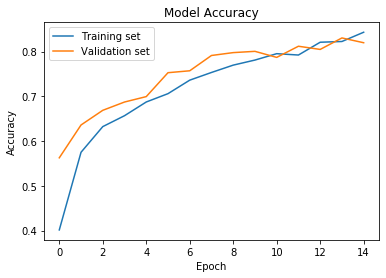

In [0]:
plt.plot(Model.history['acc'])
plt.plot(Model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()



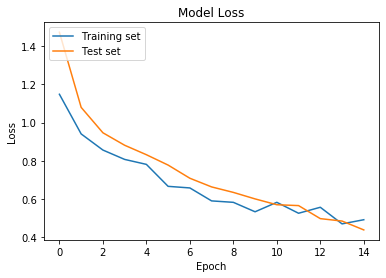

In [0]:
plt.plot(Model.history['val_loss'])
plt.plot(Model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

On sauvegarde le modèle

In [0]:
model.save("model.h5")

Affichage de 10 prédictions

In [0]:
import matplotlib.gridspec as gridspec

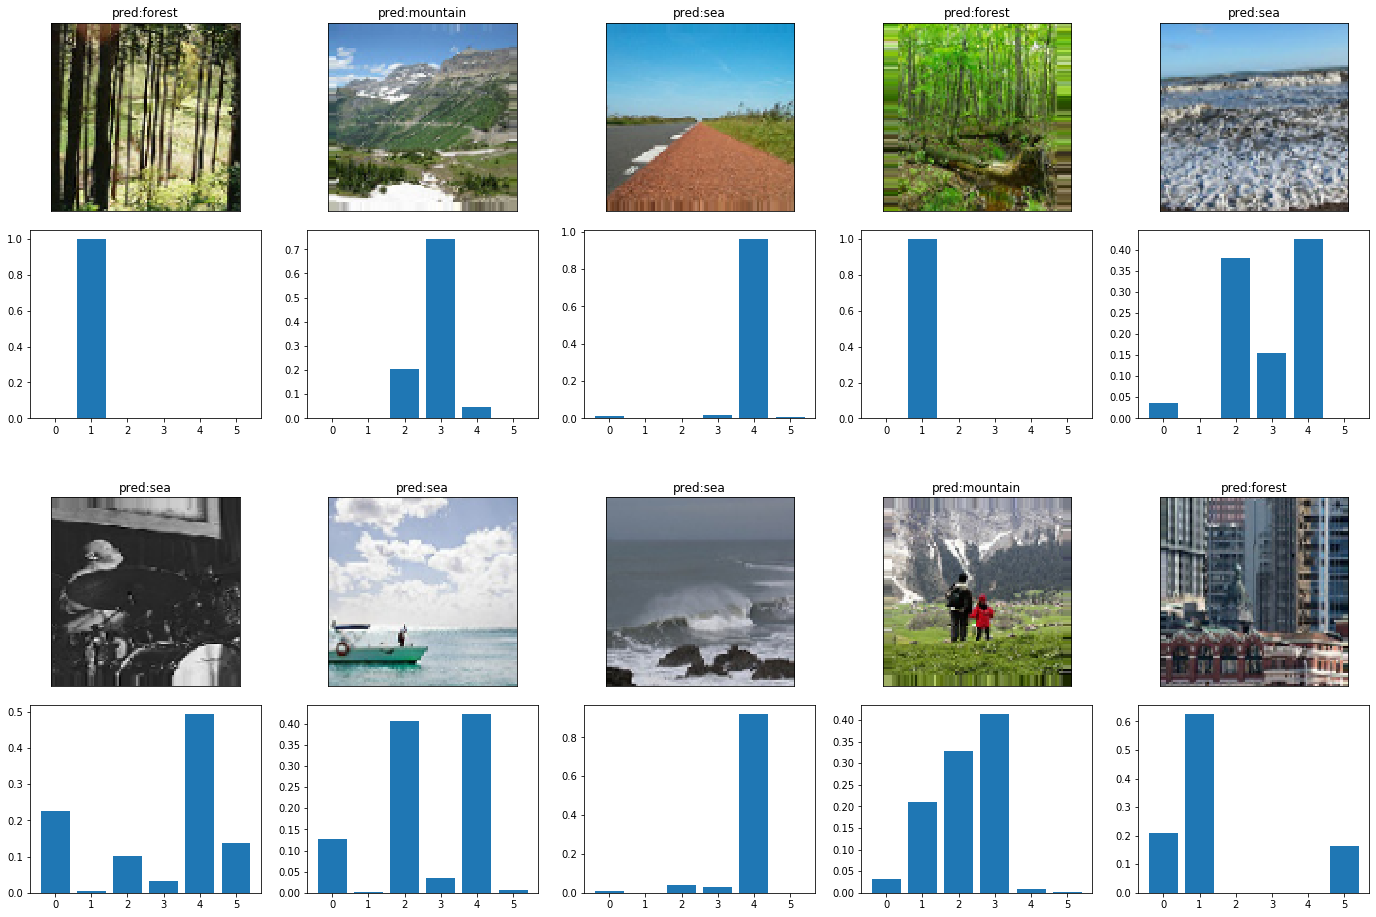

In [0]:
fig = plt.figure(figsize=(24, 16))
outer = gridspec.GridSpec(2, 5, wspace=0.2, hspace=0.2)

for i in range(10):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(X_test))
    X_test1 = np.array([X_test[rnd_number]])
    pre_labels = model.predict(X_test1)
    pred_prob = pre_labels.reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(X_test1[0])
            ax.set_title('pred:{}'.format(get_classlabel(int(np.argmax(pre_labels, axis = 1)))))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)

# <a name="5">V. Conclusion </a>

Tout au long de notre projet nous avons pu voir différentes méthodes de machine learning pour pouvoir classifier nos images représentant des scènes du monde entier. On peut voir sur nos matrice de confusion des 4 premiers modèles que les plus grand nombres se trouvent sur la diagonale cependant les résultats obtenus ne sont pas fameux le knn n'a pas reconnu énormément de batiment mais nous aurions pu essayer une autre approche pour choisir le paramètre k. De plus certaines photos comme les glaciers et la mer sont à peu près similaires notemment par leur couleur bleue et blanche,  ce qui explique certaine grande valeurs hors des diagonals de nos matrice de confusion, de meme les batiments et les rues sont parfois similaire certain de nos algorithme ont eu du mal à les différencier et celà avec beaucoup de confusion comme on s'y attendais le CNN a le meilleur score, le ANN aurait pu avoir un meilleur score on aurait peut etre dû rajouter plus de couche notemment des Dropout mais le risque d'overfitting nous semblait élevé. Le tableau suivant nous montre les différents score obtenue.

|Modèle | Score | 
|---|---|
Naives Bayes | 45%|
KNN | 40%|
SVM | 52% |
Random Forest | 60% |
ANN | 47.7% |
CNN | 82.7 %|
         